In [70]:
import matplotlib.pyplot as plt
import networkx as nx
import requests
import scipy as scipy


In [71]:
url1="https://people.rit.edu/nxmsma/courses/data/CElegansFrontal.txt"
url2="https://people.rit.edu/nxmsma/courses/data/CElegans2.csv"
file1="./data/CElegansFrontal.txt"
file2="./data/CElegans2.csv"

response1=requests.get(url1)
response2=requests.get(url2)

if response1.status_code==200:
    with open(file1, 'wb') as f:
        f.write(response1.content)
    print("File 1 downloaded sucessfully")
else:
    print("File 1 download failed ", response1.status_code)

if response2.status_code==200:
    with open(file2, 'wb') as f:
        f.write(response2.content)
    print("File 2 downloaded sucessfully")
else:
    print("File 2 download failed ", response1.status_code)

File 1 downloaded sucessfully
File 2 downloaded sucessfully


In [87]:
G=nx.DiGraph()

with open(file1, 'r') as file:
    for line in file:
        nodes=line.strip().split()
        if len(nodes)==2:
            node1=nodes[0]
            node2=nodes[1]
            G.add_edge(node1,node2)

nodeNames={}
nodePositions={}
with open(file2, 'r') as file:
    next(file)
    for line in file:
        nodeID, nodeName, x, y = line.strip().split(',')
        nodeName=nodeName[1:-1]
        nodePositions[nodeID]=((float(x), float(y)))
        nodeNames[nodeID]=nodeName

nodeDegree = dict(G.degree())
nodeSizes=[20*nodeDegree[nodeID]+2 for nodeID in G.nodes()]
localClusteringCoeff=nx.clustering(G)
minCoeff=min(localClusteringCoeff.values())
maxCoeff=max(localClusteringCoeff.values())
normalizedCoeffs={
    node: (localClusteringCoeff[node]-minCoeff)/(maxCoeff-minCoeff) for node in localClusteringCoeff
}

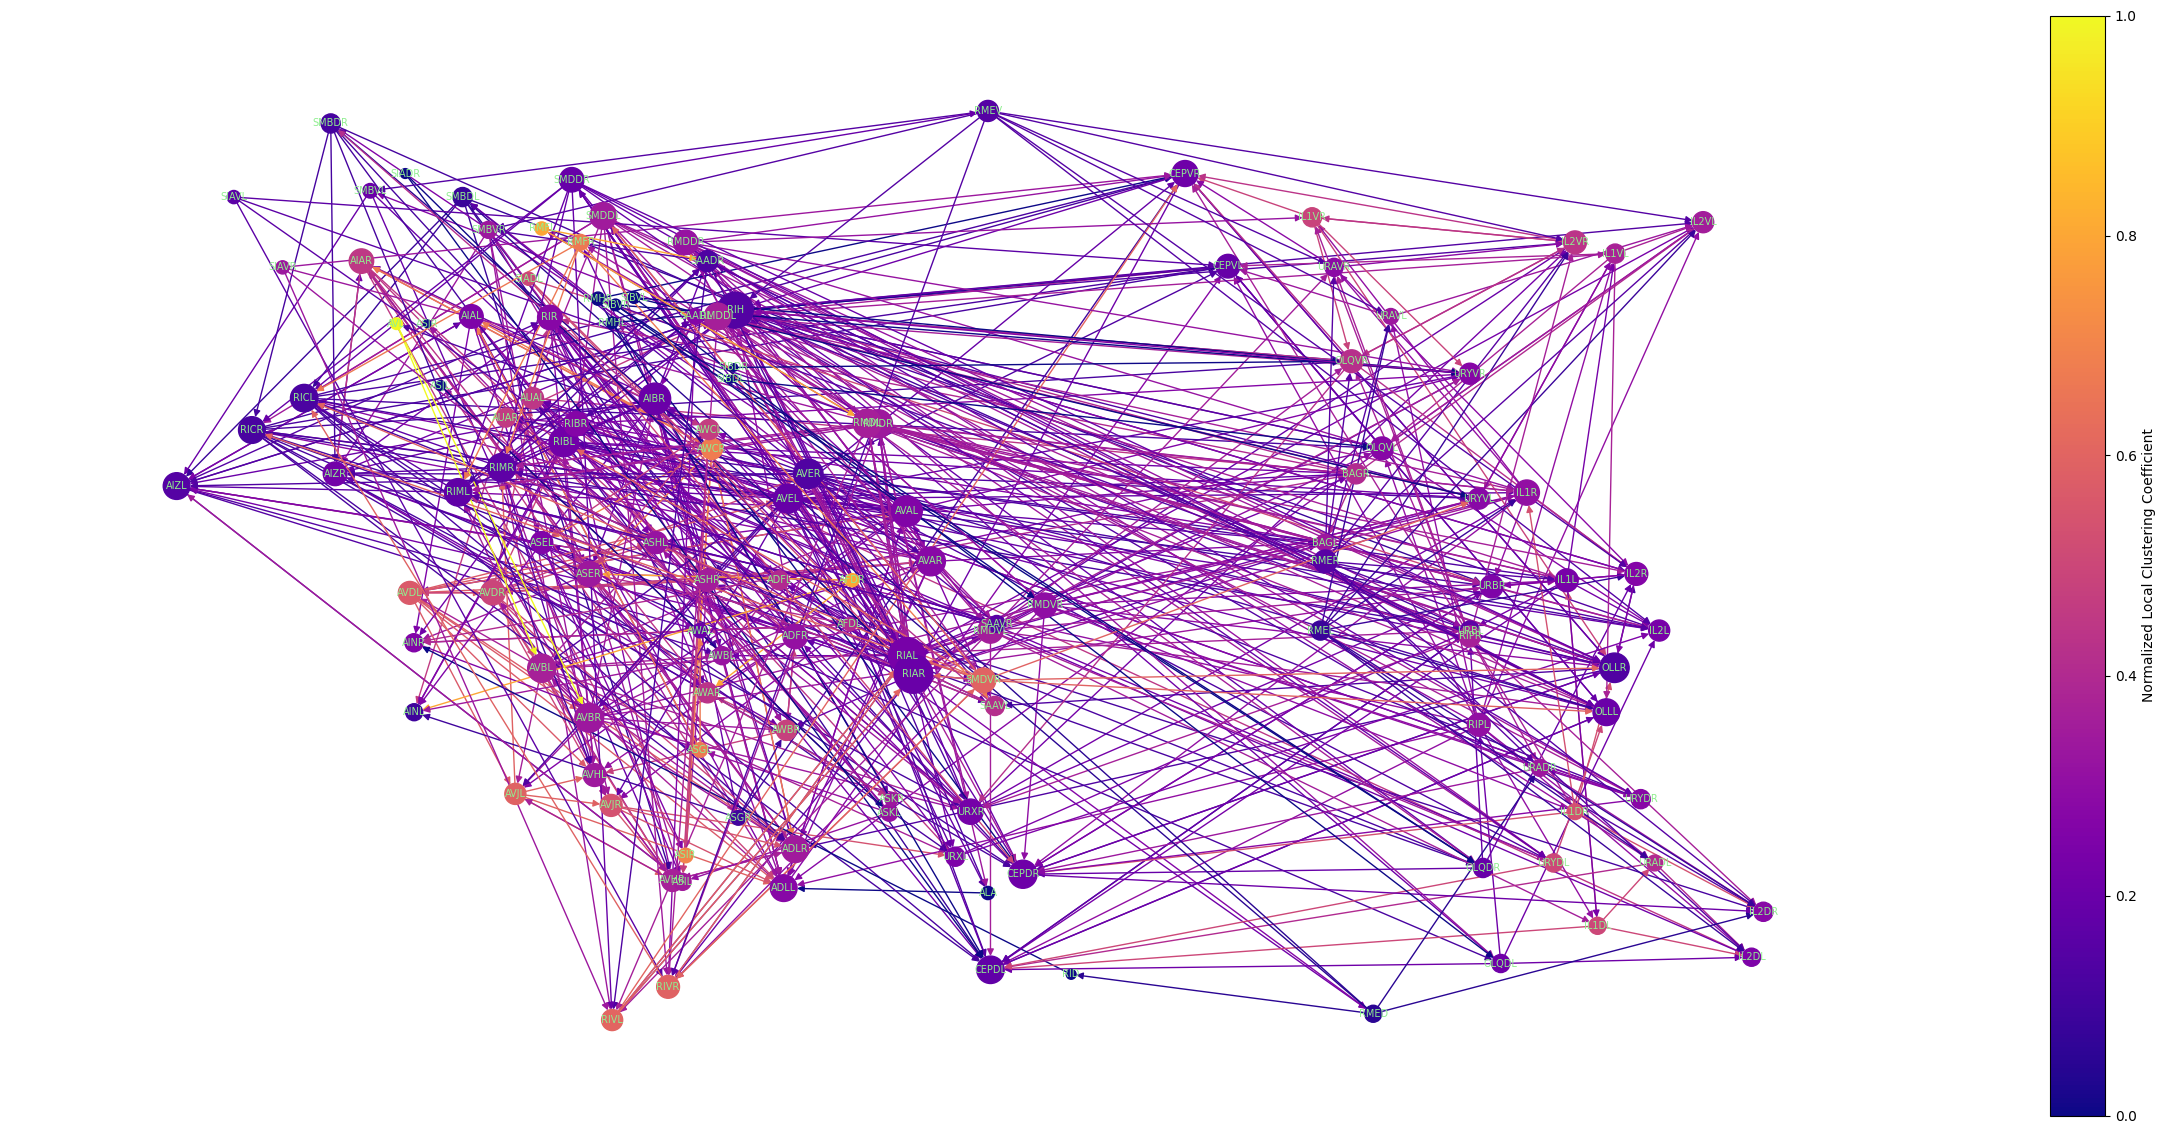

In [120]:
plt.figure(figsize=(24, 11))
colormap=plt.cm.plasma
norm=plt.Normalize(vmin=0, vmax=1)
nodeColors={}
for nodeID in G.nodes():
    nodeColors[nodeID]=colormap(normalizedCoeffs[nodeID])
        
edgeColors={edge: nodeColors[edge[0]] for edge in sorted(G.edges())}
nx.draw(G, pos=nodePositions, with_labels=True, labels=nodeNames, font_size=7, node_size=[v*20+10 for v in nodeDegree.values()], node_color=[w for w in nodeColors.values()], edge_color=[edgeColors[edge] for edge in G.edges()], font_color="lightgreen")
sm=plt.cm.ScalarMappable(cmap=colormap, norm=norm)
cbar=plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Normalized Local Clustering Coefficient')
plt.show()